In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling

In [2]:
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

In [3]:
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer
# center and scale the data
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [5]:
data = pd.read_csv('cc_general.csv')

In [6]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Exporting pandas profiling output to html file

In [9]:
report = pandas_profiling.ProfileReport(data)
report.to_file(output_file = 'pandas_profiling.html')
report

In [10]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [11]:
data['MONTHLY_AVG_PURCHASE'] = data['PURCHASES'] / data['TENURE']
data['MONTHLY_CASH_ADVANCE'] = data['CASH_ADVANCE'] / data['TENURE']
data['LIMIT_USAGE'] = data['BALANCE'] / data['CREDIT_LIMIT']

data.loc[(data['ONEOFF_PURCHASES'] == 0) & (data['INSTALLMENTS_PURCHASES'] == 0), 'PURCHASE_TYPE'] = 0  #'None'
data.loc[(data['ONEOFF_PURCHASES'] > 0) & (data['INSTALLMENTS_PURCHASES'] == 0), 'PURCHASE_TYPE'] = 1   #'One_Of'
data.loc[(data['ONEOFF_PURCHASES'] == 0) & (data['INSTALLMENTS_PURCHASES'] > 0), 'PURCHASE_TYPE'] = 2   #'Installment_Purchases'
data.loc[(data['ONEOFF_PURCHASES'] > 0) & (data['INSTALLMENTS_PURCHASES'] > 0), 'PURCHASE_TYPE'] = 3    #'Both'

In [12]:
numeric_var_names = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float16', 'int16']]
cat_var_names = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]

In [13]:
data_num = data[numeric_var_names]
data_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PURCHASE_TYPE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,2.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,1.0


In [14]:
data_cat = data[cat_var_names]
data_cat.head()

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005


### Data Audit Report

In [15]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), 
                      x.dropna().quantile(0.01), x.dropna().quantile(0.05), x.dropna().quantile(0.10), 
                      x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), 
                      x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,
                         'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary = data_num.apply(var_summary).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.138560
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.570000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.250000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.000000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.211760
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.500000


### Handling Outliers 

In [16]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x
data_num = data_num.apply(outlier_capping)

### Handling missings

In [17]:
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num = data_num.apply(lambda x: Missing_imputation(x))

In [18]:
data_num.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
MONTHLY_AVG_PURCHASE                0
MONTHLY_CASH_ADVANCE                0
LIMIT_USAGE                         0
PURCHASE_TYPE                       0
dtype: int64

In [19]:
corrm = data_num.corr()
corrm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PURCHASE_TYPE
BALANCE,1.000000,0.336473,0.165697,0.155082,0.093372,0.541226,-0.087193,0.070796,-0.072010,0.463637,...,0.133319,0.528972,0.344744,0.587668,-0.331618,0.074122,0.162593,0.516470,0.578120,-0.078167
BALANCE_FREQUENCY,0.336473,1.000000,0.170515,0.137893,0.153734,0.107785,0.232890,0.202845,0.179472,0.193894,...,0.212610,0.098461,0.092491,0.208279,-0.098040,0.121525,0.166385,0.093842,0.448961,0.103123
PURCHASES,0.165697,0.170515,1.000000,0.885793,0.708735,-0.091164,0.504218,0.608351,0.400843,-0.149419,...,0.780817,0.367477,0.536270,0.131455,0.202887,0.107263,0.994358,-0.095085,-0.085801,0.469938
ONEOFF_PURCHASES,0.155082,0.137893,0.885793,1.000000,0.333809,-0.064195,0.349884,0.683819,0.158892,-0.103046,...,0.630735,0.342667,0.482418,0.064248,0.145981,0.080378,0.883943,-0.066990,-0.066100,0.332527
INSTALLMENTS_PURCHASES,0.093372,0.153734,0.708735,0.333809,1.000000,-0.102052,0.551693,0.248240,0.634500,-0.162397,...,0.687538,0.239973,0.369886,0.148561,0.215048,0.103310,0.700536,-0.105991,-0.090557,0.507243
CASH_ADVANCE,0.541226,0.107785,-0.091164,-0.064195,-0.102052,1.000000,-0.249835,-0.104954,-0.207395,0.683400,...,-0.112613,0.314398,0.425517,0.257143,-0.179068,-0.083485,-0.087192,0.983706,0.260306,-0.246666
PURCHASES_FREQUENCY,-0.087193,0.232890,0.504218,0.349884,0.551693,-0.249835,1.000000,0.501343,0.862934,-0.312493,...,0.642234,0.119658,0.120897,0.001043,0.305802,0.061506,0.504918,-0.248987,-0.221306,0.773817
ONEOFF_PURCHASES_FREQUENCY,0.070796,0.202845,0.608351,0.683819,0.248240,-0.104954,0.501343,1.000000,0.142329,-0.113575,...,0.601289,0.296128,0.278313,-0.016426,0.157531,0.082466,0.607920,-0.106243,-0.097239,0.411188
PURCHASES_INSTALLMENTS_FREQUENCY,-0.072010,0.179472,0.400843,0.158892,0.634500,-0.207395,0.862934,0.142329,1.000000,-0.265907,...,0.593674,0.060279,0.097830,0.032330,0.250087,0.073275,0.396831,-0.208256,-0.178811,0.721690
CASH_ADVANCE_FREQUENCY,0.463637,0.193894,-0.149419,-0.103046,-0.162397,0.683400,-0.312493,-0.113575,-0.265907,1.000000,...,-0.151307,0.134731,0.215544,0.203585,-0.253292,-0.129136,-0.144522,0.681374,0.398012,-0.307963


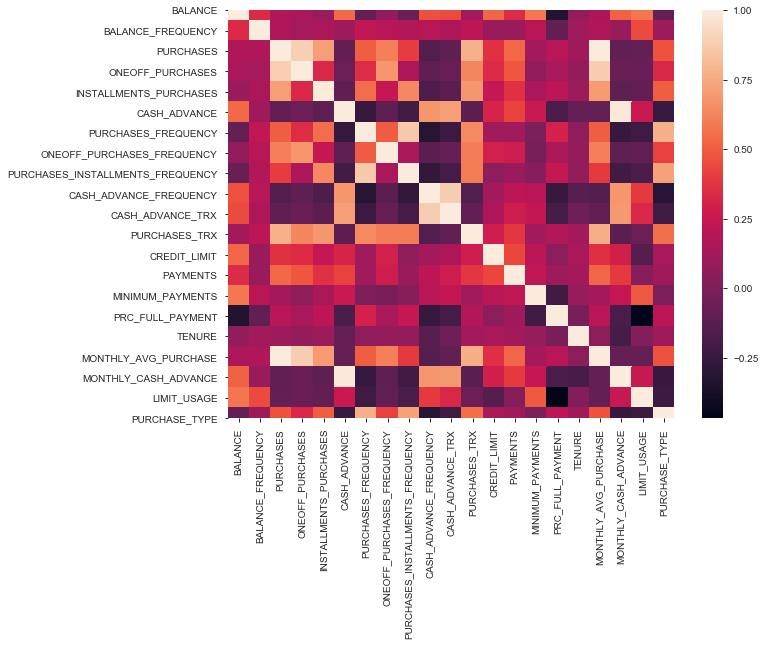

In [20]:
sns.heatmap(corrm)

### Standardrizing data 
- To put data on the same scale 

In [21]:
sc = StandardScaler()
 
data_scaled = sc.fit_transform(data_num) 

In [22]:
pd.DataFrame(data_scaled).head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,...,-0.579714,-0.978415,-0.642945,-0.486172,-0.525551,0.36068,-0.560473,-0.518323,-0.984931,0.311372
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,...,-0.675130,0.711297,1.089747,0.255009,0.234227,0.36068,-0.621842,2.758763,0.203998,-1.439116
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,...,-0.102638,0.852106,-0.456289,-0.098610,-0.525551,0.36068,-0.124478,-0.518323,-0.152197,-0.563872
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,...,-0.627422,0.852106,-0.732573,-0.348846,-0.525551,0.36068,0.342433,-0.413652,-0.467452,-0.563872
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,...,-0.627422,-0.922091,-0.431298,-0.402520,-0.525551,0.36068,-0.611549,-0.518323,0.843086,-0.563872


In [23]:
corrm = data_num.corr()
corrm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PURCHASE_TYPE
BALANCE,1.000000,0.336473,0.165697,0.155082,0.093372,0.541226,-0.087193,0.070796,-0.072010,0.463637,...,0.133319,0.528972,0.344744,0.587668,-0.331618,0.074122,0.162593,0.516470,0.578120,-0.078167
BALANCE_FREQUENCY,0.336473,1.000000,0.170515,0.137893,0.153734,0.107785,0.232890,0.202845,0.179472,0.193894,...,0.212610,0.098461,0.092491,0.208279,-0.098040,0.121525,0.166385,0.093842,0.448961,0.103123
PURCHASES,0.165697,0.170515,1.000000,0.885793,0.708735,-0.091164,0.504218,0.608351,0.400843,-0.149419,...,0.780817,0.367477,0.536270,0.131455,0.202887,0.107263,0.994358,-0.095085,-0.085801,0.469938
ONEOFF_PURCHASES,0.155082,0.137893,0.885793,1.000000,0.333809,-0.064195,0.349884,0.683819,0.158892,-0.103046,...,0.630735,0.342667,0.482418,0.064248,0.145981,0.080378,0.883943,-0.066990,-0.066100,0.332527
INSTALLMENTS_PURCHASES,0.093372,0.153734,0.708735,0.333809,1.000000,-0.102052,0.551693,0.248240,0.634500,-0.162397,...,0.687538,0.239973,0.369886,0.148561,0.215048,0.103310,0.700536,-0.105991,-0.090557,0.507243
CASH_ADVANCE,0.541226,0.107785,-0.091164,-0.064195,-0.102052,1.000000,-0.249835,-0.104954,-0.207395,0.683400,...,-0.112613,0.314398,0.425517,0.257143,-0.179068,-0.083485,-0.087192,0.983706,0.260306,-0.246666
PURCHASES_FREQUENCY,-0.087193,0.232890,0.504218,0.349884,0.551693,-0.249835,1.000000,0.501343,0.862934,-0.312493,...,0.642234,0.119658,0.120897,0.001043,0.305802,0.061506,0.504918,-0.248987,-0.221306,0.773817
ONEOFF_PURCHASES_FREQUENCY,0.070796,0.202845,0.608351,0.683819,0.248240,-0.104954,0.501343,1.000000,0.142329,-0.113575,...,0.601289,0.296128,0.278313,-0.016426,0.157531,0.082466,0.607920,-0.106243,-0.097239,0.411188
PURCHASES_INSTALLMENTS_FREQUENCY,-0.072010,0.179472,0.400843,0.158892,0.634500,-0.207395,0.862934,0.142329,1.000000,-0.265907,...,0.593674,0.060279,0.097830,0.032330,0.250087,0.073275,0.396831,-0.208256,-0.178811,0.721690
CASH_ADVANCE_FREQUENCY,0.463637,0.193894,-0.149419,-0.103046,-0.162397,0.683400,-0.312493,-0.113575,-0.265907,1.000000,...,-0.151307,0.134731,0.215544,0.203585,-0.253292,-0.129136,-0.144522,0.681374,0.398012,-0.307963


In [24]:
eigen_values = np.linalg.eigvals(corrm)
eigen_values_cumvar = (eigen_values / 21).cumsum()
eigen_values_cumvar

array([0.30299967, 0.5266306 , 0.61403772, 0.68928785, 0.74329351,
       0.78923037, 0.82861103, 0.86373478, 0.89215422, 0.91687564,
       0.9336864 , 0.94910255, 0.96394094, 0.97655452, 0.98544752,
       0.99149168, 0.99647318, 0.99844559, 0.99893693, 0.9991089 ,
       1.        ])

In [25]:
Factor_Analysis = FactorAnalyzer(n_factors = 5, rotation = 'varimax', method = 'ml')

In [26]:
Factor_Analysis.fit(data_num)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='ml', n_factors=5, rotation='varimax', rotation_kwargs={},
               use_smc=True)

In [27]:
loadings = Factor_Analysis.loadings_
loadings =pd.DataFrame(loadings, index = data_num.columns, columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'])

loadings

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
BALANCE,0.179083,0.455389,-0.048508,0.627223,0.050399
BALANCE_FREQUENCY,0.108573,0.058502,0.241810,0.525617,-0.046086
PURCHASES,0.918483,-0.064264,0.259056,0.045827,0.280654
ONEOFF_PURCHASES,0.975887,-0.058292,0.066321,0.024748,-0.119946
INSTALLMENTS_PURCHASES,0.398560,-0.049498,0.482489,0.048632,0.753216
CASH_ADVANCE,-0.005174,0.981674,-0.104478,0.142399,-0.010615
PURCHASES_FREQUENCY,0.283227,-0.147476,0.943830,-0.037093,-0.029162
ONEOFF_PURCHASES_FREQUENCY,0.641742,-0.074602,0.316970,0.016991,-0.240975
PURCHASES_INSTALLMENTS_FREQUENCY,0.116482,-0.113867,0.867457,-0.015646,0.221196
CASH_ADVANCE_FREQUENCY,-0.067028,0.628101,-0.200569,0.338353,-0.035679


In [28]:
loadings.to_csv('python_FA.csv')

### Clustering 

In [29]:
loadings.index

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'LIMIT_USAGE',
       'PURCHASE_TYPE'],
      dtype='object')

In [30]:
#selected the list variables from FA based on factor loading matrics
list_var = ['TENURE', 'PAYMENTS', 'PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES', 'PURCHASES_TRX', 'MONTHLY_CASH_ADVANCE']

In [31]:
data_scaled1 = pd.DataFrame(data_scaled, columns = data_num.columns)
data_scaled1.head(5)

data_scaled2 = data_scaled1[list_var]
data_scaled2.head(10)

,TENURE,PAYMENTS,PURCHASES,ONEOFF_PURCHASES_FREQUENCY,ONEOFF_PURCHASES,PURCHASES_TRX,MONTHLY_CASH_ADVANCE
0,0.36068,-0.642945,-0.551327,-0.678661,-0.489121,-0.579714,-0.518323
1,0.36068,1.089747,-0.613881,-0.678661,-0.489121,-0.675130,2.758763
2,0.36068,-0.456289,-0.106917,2.673451,0.215778,-0.102638,-0.518323
3,0.36068,-0.732573,0.369006,-0.399319,0.877517,-0.627422,-0.413652
4,0.36068,-0.431298,-0.603389,-0.399319,-0.474534,-0.627422,-0.518323
5,0.36068,-0.110752,0.260344,-0.678661,-0.489121,-0.293468,-0.518323
6,0.36068,2.089631,4.035657,2.673451,5.348155,2.378162,-0.518323
7,0.36068,-0.430973,-0.327867,-0.678661,-0.489121,-0.102638,-0.518323
8,0.36068,-0.426881,-0.049006,-0.399319,0.113959,-0.436591,-0.518323
9,0.36068,-0.215252,0.226458,-0.119974,0.679313,-0.532007,-0.518323


## Segmentation

In [32]:
km_3 = KMeans(n_clusters = 3, random_state = 123)

In [33]:
km_3.fit(data_scaled2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [34]:
km_3.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [35]:
km_3.cluster_centers_

array([[-2.93696921, -0.37591009, -0.36350835, -0.29609967, -0.29320716,
        -0.4240936 ,  0.69458097],
       [ 0.28655642,  1.16377449,  2.04758674,  1.75032181,  1.98566914,
         1.85757188, -0.12720334],
       [ 0.28581738, -0.14264474, -0.2845849 , -0.2449207 , -0.28267121,
        -0.24753341, -0.05814363]])

In [36]:
km_4 = KMeans(n_clusters = 4, random_state = 123).fit(data_scaled2)
km_5 = KMeans(n_clusters = 5, random_state = 123).fit(data_scaled2)
km_6 = KMeans(n_clusters = 6, random_state = 123).fit(data_scaled2)
km_7 = KMeans(n_clusters = 7, random_state = 123).fit(data_scaled2)
km_8 = KMeans(n_clusters = 8, random_state = 123).fit(data_scaled2)

In [37]:
# save the cluster labels and sort by cluster
data_num['cluster_3'] = km_3.labels_
data_num['cluster_4'] = km_4.labels_
data_num['cluster_5'] = km_5.labels_
data_num['cluster_6'] = km_6.labels_
data_num['cluster_7'] = km_7.labels_
data_num['cluster_8'] = km_8.labels_

In [38]:
data_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PURCHASE_TYPE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,7.950000,0.000000,0.040901,2.0,2,0,0,3,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.000000,536.912124,0.457495,0.0,2,0,4,0,5,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,64.430833,0.000000,0.332687,1.0,2,1,1,1,4,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,124.916667,17.149001,0.222223,1.0,2,0,0,3,0,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.333333,0.000000,0.681429,1.0,2,0,0,3,0,0


In [39]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

2    0.786257
1    0.125028
0    0.088715
dtype: float64

In [40]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

0    0.686592
1    0.182235
2    0.087263
3    0.043911
dtype: float64

In [41]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

0    0.630056
1    0.175419
2    0.079888
4    0.072849
3    0.041788
dtype: float64

### Choosing number clusters using Silhouette Coefficient

In [42]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(data_scaled2, km_3.labels_)

0.47554180889643494

In [43]:
# calculate SC for K=3 through K=12
k_range = range(2, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 123)
    km.fit(data_scaled2)
    scores.append(metrics.silhouette_score(data_scaled2, km.labels_))

In [44]:
scores

[0.5311265517288464,
 0.47554180889643494,
 0.4439226741297482,
 0.46889899799318546,
 0.42660386228425806,
 0.39636150140247595,
 0.3548935567469014,
 0.3577046453401536,
 0.3554037700082378,
 0.35486125032842175]

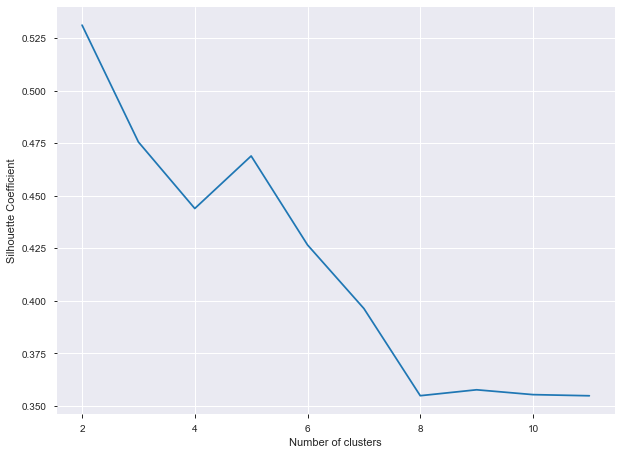

In [45]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##### Note

The solution can be 5 based on the SC score. If we take highest SC score, 5 segment solution could be best

### Finding Optimal number of clusters using Elbow Analysis 

In [46]:
cluster_range = range(2, 20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(data_scaled2)
    cluster_errors.append(clusters.inertia_)

In [47]:
clusters_df = pd.DataFrame({ "num_clusters" : cluster_range, "cluster_errors" : cluster_errors})

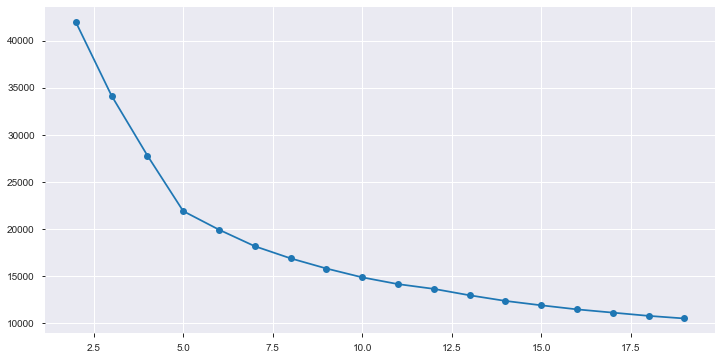

In [48]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces to 5. So, optimal number of clusters could be 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

In [49]:
data_num.cluster_5.value_counts()/sum(data_num.cluster_5.value_counts())

0    0.630056
1    0.175419
2    0.079888
4    0.072849
3    0.041788
Name: cluster_5, dtype: float64

## Profiling

In [50]:
# Segment Distribution

data_num.cluster_3.value_counts()/data_num.shape[0]

2    0.786257
1    0.125028
0    0.088715
Name: cluster_3, dtype: float64

In [51]:
# number of values in each cluster 
size = pd.concat([pd.Series(data_num.cluster_3.size), pd.Series.sort_index(data_num.cluster_3.value_counts()), pd.Series.sort_index(data_num.cluster_4.value_counts()),
           pd.Series.sort_index(data_num.cluster_5.value_counts()), pd.Series.sort_index(data_num.cluster_6.value_counts()),
           pd.Series.sort_index(data_num.cluster_7.value_counts()), pd.Series.sort_index(data_num.cluster_8.value_counts())])

In [52]:
Seg_size = pd.DataFrame(size, columns = ['Seg_size'])
Seg_Pct = pd.DataFrame(size / data_num.cluster_3.size, columns = ['Seg_Pct'])

In [53]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.088715,0.125028,0.786257,0.686592,0.182235,0.087263,0.043911,0.630056,0.175419,...,0.102682,0.022123,0.479441,0.021676,0.02514,0.058547,0.089832,0.078659,0.098212,0.148492


In [54]:
pd.concat([Seg_size.T, Seg_Pct.T], axis = 0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,794.000000,1119.000000,7037.000000,6145.000000,1631.000000,781.000000,393.000000,5639.000000,1570.000000,...,919.000000,198.000000,4291.000000,194.000000,225.00000,524.000000,804.000000,704.000000,879.000000,1329.000000
Seg_Pct,1.0,0.088715,0.125028,0.786257,0.686592,0.182235,0.087263,0.043911,0.630056,0.175419,...,0.102682,0.022123,0.479441,0.021676,0.02514,0.058547,0.089832,0.078659,0.098212,0.148492


In [55]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([data_num.apply(lambda x: x.mean()).T, data_num.groupby('cluster_3').apply(lambda x: x.mean()).T, data_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          data_num.groupby('cluster_5').apply(lambda x: x.mean()).T, data_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          data_num.groupby('cluster_7').apply(lambda x: x.mean()).T, data_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [56]:
Profling_output_final = pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis = 0)

In [57]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [58]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,794.000000,1119.000000,7037.000000,6145.000000,1631.000000,781.000000,393.000000,5639.000000,1570.000000,...,919.000000,198.000000,4291.000000,194.000000,225.000000,524.000000,804.000000,704.000000,879.000000,1329.000000
Seg_Pct,1.000000,0.088715,0.125028,0.786257,0.686592,0.182235,0.087263,0.043911,0.630056,0.175419,...,0.102682,0.022123,0.479441,0.021676,0.025140,0.058547,0.089832,0.078659,0.098212,0.148492
BALANCE,1541.046707,1199.653692,2318.432101,1455.949620,1450.478238,1662.666915,1187.555459,3154.933073,1204.959967,1581.324045,...,3719.869405,3341.531851,978.984378,3367.934520,4111.248977,2351.549145,1321.007510,934.328410,3743.555186,1332.190930
BALANCE_FREQUENCY,0.878083,0.793703,0.973475,0.872435,0.859577,0.964028,0.792119,0.981608,0.855882,0.963962,...,0.927345,0.984171,0.837073,0.983845,0.870864,0.974431,0.971423,0.784516,0.927442,0.918741
PURCHASES,936.229237,381.842657,4059.003718,502.208816,376.922327,1996.879589,374.284673,6396.531883,388.056171,2031.673866,...,250.926279,7799.402374,248.499236,7846.965000,789.242000,3981.873702,1461.181356,382.166733,229.885245,1415.082506
ONEOFF_PURCHASES,536.493774,214.888841,2714.479399,226.445231,130.495990,1309.504537,207.774008,4329.893176,132.439934,1334.081809,...,127.699652,5550.651404,70.774838,5574.038804,425.884978,2507.190153,1137.625995,208.761122,119.723868,632.139014
INSTALLMENTS_PURCHASES,384.498368,167.331650,1222.800197,275.697832,246.592682,678.694941,166.894789,1752.295379,255.822479,688.428834,...,123.337258,1861.880025,178.001214,1878.078531,340.824538,1378.405007,323.555361,173.831747,110.277042,778.548251
CASH_ADVANCE,935.920972,1616.051949,744.248277,889.659462,948.288222,566.146750,1605.652750,946.212288,530.905142,399.574645,...,3857.617379,822.901668,348.745321,836.941022,6747.254513,530.922787,394.473339,1129.131706,3913.807852,277.668755
PURCHASES_FREQUENCY,0.490351,0.404458,0.917793,0.432072,0.376598,0.854069,0.404575,0.929975,0.393641,0.858750,...,0.192569,0.928711,0.355587,0.927241,0.310406,0.925563,0.879520,0.426162,0.182415,0.722797
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.114125,0.724613,0.129393,0.064901,0.630370,0.109854,0.761443,0.066702,0.637008,...,0.063881,0.818243,0.044102,0.817932,0.135300,0.682085,0.796978,0.109998,0.061238,0.228880


In [59]:
Profling_output_final.to_csv('Profiling_output.csv')

### Assigning segments to new data (Predicting segment for new data)

In [60]:
new_cust = pd.read_excel('Credit_new_cust.xlsx')

In [61]:
new_cust = new_cust.drop('CUST_ID', axis = 1)

In [62]:
new_cust.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791237,0.000000,12


In [63]:
new_cust['MONTHLY_AVG_PURCHASE'] = new_cust['PURCHASES'] / data['TENURE']
new_cust['MONTHLY_CASH_ADVANCE'] = new_cust['CASH_ADVANCE'] / data['TENURE']
new_cust['LIMIT_USAGE'] = new_cust['BALANCE'] / data['CREDIT_LIMIT']

In [64]:
new_cust_scaled = sc.fit_transform(new_cust)

In [65]:
list_var = ['TENURE', 'PAYMENTS', 'PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES', 'PURCHASES_TRX', 'MONTHLY_CASH_ADVANCE']

In [66]:
new_cust_scaled = pd.DataFrame(new_cust_scaled, columns = new_cust.columns)

In [67]:
new_cust_scaled = new_cust_scaled[list_var]

In [68]:
new_cust_scaled.head()

,TENURE,PAYMENTS,PURCHASES,ONEOFF_PURCHASES_FREQUENCY,ONEOFF_PURCHASES,PURCHASES_TRX,MONTHLY_CASH_ADVANCE
0,0.0,-0.735283,-0.802946,-0.667887,-0.648913,-0.654056,-0.286768
1,0.0,1.610519,-0.857055,-0.667887,-0.648913,-0.776146,3.603715
2,0.0,-0.482579,-0.418533,2.364682,-0.182081,-0.043604,-0.286768
3,0.0,-0.856626,-0.006862,-0.415174,0.256168,-0.715101,-0.162505
4,0.0,-0.448745,-0.847980,-0.415174,-0.639252,-0.715101,-0.286768


In [69]:
centroids = km_5.cluster_centers_
centroids

array([[ 0.28024411, -0.3227386 , -0.35943419, -0.45506882, -0.36837582,
        -0.33167505, -0.24549114],
       [ 0.28167188,  0.15284694,  0.71827726,  1.45666262,  0.72716088,
         0.85793305, -0.31212384],
       [-3.07140445, -0.48190024, -0.36059926, -0.30108781, -0.29504894,
        -0.4215117 ,  0.41319204],
       [ 0.3087323 ,  2.27182894,  3.66173425,  1.91467662,  3.54701085,
         2.8687865 , -0.12154938],
       [ 0.08905967,  1.64853977, -0.32592955, -0.33993635, -0.27606349,
        -0.38065115,  2.49138977]])

In [70]:
km_5.predict(new_cust_scaled)

array([0, 4, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0])

In [71]:
new_cust['pred_segment'] = pd.Series(km_5.predict(new_cust_scaled))

In [72]:
new_cust.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,pred_segment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,8,1800,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,1.005460,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,64,13500,6354.314328,198.065894,1.000000,12,590.917500,0.000000,0.046464,3
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,12,2300,679.065082,532.033990,0.000000,12,36.350000,0.000000,0.792892,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,5,7000,688.278568,311.963409,0.000000,12,71.790833,0.000000,0.144989,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,3,11000,1164.770591,100.302262,0.000000,12,106.800000,0.000000,0.013839,0
